# Pattern Mining

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from fim import apriori

In [2]:
df = pd.read_csv("training.csv", skipinitialspace=True, sep=',')

In [3]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623


Useless columns

In [4]:
column_to_drop = ["RefId","Auction","VehYear",
                  "Trim","SubModel","Color",
                  "MMRAcquisitionAuctionCleanPrice",
                  "MMRCurrentAuctionCleanPrice",
                  "MMRAcquisitonRetailCleanPrice",
                  "MMRCurrentAuctionAveragePrice","WheelTypeID",
                  "MMRCurrentRetailAveragePrice",
                  "MMRCurrentRetailCleanPrice","PRIMEUNIT",
                  "AUCGUART","BYRNO","VNST","Model", "VNZIP1", "WheelType"]

In [5]:
df = df.drop(columns= column_to_drop)
df.head()

,IsBadBuy,PurchDate,VehicleAge,Make,Transmission,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,10/25/2010,2,KIA,AUTO,61184,OTHER ASIAN,MEDIUM,OTHER,6796.0,10140.0,6100.0,0,533
1,0,5/27/2009,3,DODGE,AUTO,92383,AMERICAN,MEDIUM,CHRYSLER,5480.0,6418.0,4000.0,0,1630
2,0,3/18/2010,2,DODGE,AUTO,45965,AMERICAN,MEDIUM,CHRYSLER,8067.0,11073.0,7500.0,0,693
3,0,6/8/2009,4,FORD,AUTO,80169,AMERICAN,VAN,FORD,4817.0,5702.0,4725.0,0,1633
4,0,3/4/2009,4,CHRYSLER,AUTO,77372,AMERICAN,VAN,CHRYSLER,5430.0,6364.0,5670.0,0,1623


In [6]:
df.PurchDate = [int(x[-4:]) for x in df.PurchDate]
df.head()

,IsBadBuy,PurchDate,VehicleAge,Make,Transmission,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionRetailAveragePrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,2010,2,KIA,AUTO,61184,OTHER ASIAN,MEDIUM,OTHER,6796.0,10140.0,6100.0,0,533
1,0,2009,3,DODGE,AUTO,92383,AMERICAN,MEDIUM,CHRYSLER,5480.0,6418.0,4000.0,0,1630
2,0,2010,2,DODGE,AUTO,45965,AMERICAN,MEDIUM,CHRYSLER,8067.0,11073.0,7500.0,0,693
3,0,2009,4,FORD,AUTO,80169,AMERICAN,VAN,FORD,4817.0,5702.0,4725.0,0,1633
4,0,2009,4,CHRYSLER,AUTO,77372,AMERICAN,VAN,CHRYSLER,5430.0,6364.0,5670.0,0,1623


In [7]:
df.isnull().sum()

IsBadBuy                              0
PurchDate                             0
VehicleAge                            0
Make                                  0
Transmission                          8
VehOdo                                0
Nationality                           4
Size                                  4
TopThreeAmericanName                  4
MMRAcquisitionAuctionAveragePrice    13
MMRAcquisitionRetailAveragePrice     13
VehBCost                              0
IsOnlineSale                          0
WarrantyCost                          0
dtype: int64

In [8]:
df = df[~df['Nationality'].isnull()]
df.isnull().sum()

IsBadBuy                              0
PurchDate                             0
VehicleAge                            0
Make                                  0
Transmission                          8
VehOdo                                0
Nationality                           0
Size                                  0
TopThreeAmericanName                  0
MMRAcquisitionAuctionAveragePrice    13
MMRAcquisitionRetailAveragePrice     13
VehBCost                              0
IsOnlineSale                          0
WarrantyCost                          0
dtype: int64

In [9]:
len(df[(df['Transmission']== 'MANUAL')])

2047

In [10]:
len(df[(df['Transmission']== 'Manual')])

1

In [11]:
len(df[(df['Transmission']== 'AUTO')])

56326

In [12]:
# CHOOSING AUTO FOR NAN BECAUSE MOST FREQUENT
df['Transmission'] = df['Transmission'].fillna('AUTO')

In [13]:
f = [x.upper() for x in df.Transmission]
df.Transmission = f

In [14]:
df.isnull().sum()

IsBadBuy                              0
PurchDate                             0
VehicleAge                            0
Make                                  0
Transmission                          0
VehOdo                                0
Nationality                           0
Size                                  0
TopThreeAmericanName                  0
MMRAcquisitionAuctionAveragePrice    13
MMRAcquisitionRetailAveragePrice     13
VehBCost                              0
IsOnlineSale                          0
WarrantyCost                          0
dtype: int64

In [15]:
df = df.dropna()
df.isnull().sum()

IsBadBuy                             0
PurchDate                            0
VehicleAge                           0
Make                                 0
Transmission                         0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionRetailAveragePrice     0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [16]:
df = df[df.Nationality != 'OTHER']
len(df[(df['Nationality'] == 'OTHER')])

0

In [17]:
df.TopThreeAmericanName.unique()

array(['OTHER', 'CHRYSLER', 'FORD', 'GM'], dtype=object)

In [18]:
# It's important if the name is different from OTHER, because it signifies it is a top three
mask = df.TopThreeAmericanName == "OTHER"
column_name = 'TopThreeAmericanName'
df.loc[mask, column_name] = 0
mask = df.TopThreeAmericanName != 0
df.loc[mask, column_name] = 1

In [19]:
df.Make.unique()

array(['KIA', 'DODGE', 'FORD', 'CHRYSLER', 'NISSAN', 'SUZUKI', 'PONTIAC',
       'CHEVROLET', 'SATURN', 'BUICK', 'MITSUBISHI', 'HONDA', 'HYUNDAI',
       'MERCURY', 'GMC', 'JEEP', 'OLDSMOBILE', 'MAZDA', 'TOYOTA', 'ISUZU',
       'ACURA', 'INFINITI', 'SCION', 'CADILLAC', 'LINCOLN', 'SUBARU',
       'LEXUS', 'PLYMOUTH', 'TOYOTA SCION', 'HUMMER'], dtype=object)

Apply binning to continuous features

In [20]:
import seaborn as sns

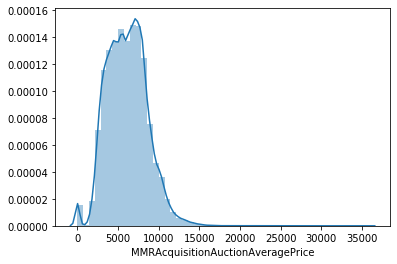

In [21]:
sns.distplot(df.MMRAcquisitionAuctionAveragePrice)

Removing 0 priced rows

In [22]:
df = df[df.MMRAcquisitionAuctionAveragePrice != 0]

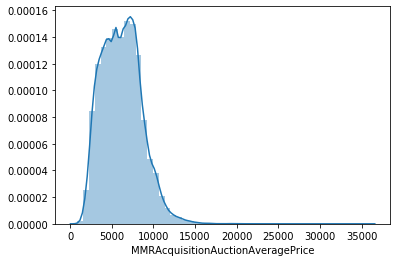

In [23]:
sns.distplot(df.MMRAcquisitionAuctionAveragePrice)

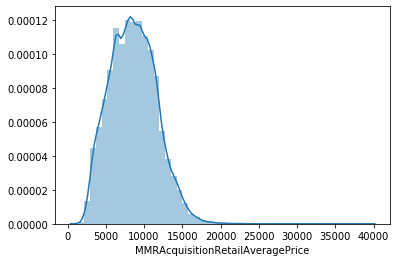

In [24]:
sns.distplot(df.MMRAcquisitionRetailAveragePrice)

Making BINS for prices, for now 50

In [25]:
df['BIN-MMRAcquisitionAuctionAveragePrice'] = pd.cut(df['MMRAcquisitionAuctionAveragePrice'].astype(int), 50, right=False)

In [26]:
df['BIN-MMRAcquisitionRetailAveragePrice'] = pd.cut(df['MMRAcquisitionRetailAveragePrice'].astype(int), 50, right=False)

In [27]:
df.drop(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice'], axis=1, inplace=True)

In [28]:
df.head()

,IsBadBuy,PurchDate,VehicleAge,Make,Transmission,VehOdo,Nationality,Size,TopThreeAmericanName,VehBCost,IsOnlineSale,WarrantyCost,BIN-MMRAcquisitionAuctionAveragePrice,BIN-MMRAcquisitionRetailAveragePrice
0,1,2010,2,KIA,AUTO,61184,OTHER ASIAN,MEDIUM,0,6100.0,0,533,"[6458.08, 7154.84)","[9732.5, 10485.0)"
1,0,2009,3,DODGE,AUTO,92383,AMERICAN,MEDIUM,1,4000.0,0,1630,"[5064.56, 5761.32)","[5970.0, 6722.5)"
2,0,2010,2,DODGE,AUTO,45965,AMERICAN,MEDIUM,1,7500.0,0,693,"[7851.6, 8548.36)","[10485.0, 11237.5)"
3,0,2009,4,FORD,AUTO,80169,AMERICAN,VAN,1,4725.0,0,1633,"[4367.8, 5064.56)","[5217.5, 5970.0)"
4,0,2009,4,CHRYSLER,AUTO,77372,AMERICAN,VAN,1,5670.0,0,1623,"[5064.56, 5761.32)","[5970.0, 6722.5)"


Making BINS for VehOdo, for now 10

In [29]:
df['BIN-VehOdo'] = pd.cut(df['VehOdo'].astype(int), 10, right=False)
df.drop(['VehOdo'], axis=1, inplace=True)

Making BINS for VehBCost, for now 10

In [30]:
df['BIN-VehBCost'] = pd.cut(df['VehBCost'].astype(int), 10, right=False)
df.drop(['VehBCost'], axis=1, inplace=True)

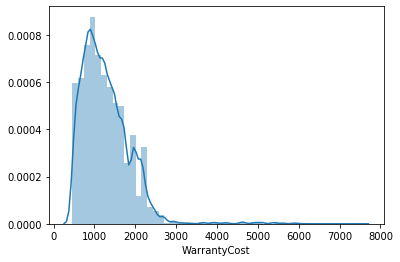

In [31]:
sns.distplot(df.WarrantyCost)

Making BINS for WarrantyCost, for now 10

In [32]:
df['BIN-WarrantyCost'] = pd.cut(df['WarrantyCost'].astype(int), 10, right=False)
df.drop(['WarrantyCost'], axis=1, inplace=True)

Remap values

In [33]:
df['BIN-MMRAcquisitionAuctionAveragePrice'] = df['BIN-MMRAcquisitionAuctionAveragePrice'].astype(str) + '_acq-auc-av-price'
df['BIN-MMRAcquisitionRetailAveragePrice'] = df['BIN-MMRAcquisitionRetailAveragePrice'].astype(str) + '_acq-ret-av-price'

In [34]:
df['BIN-VehOdo'] = df['BIN-VehOdo'].astype(str) + '_VEH_HODO'
df['BIN-VehBCost'] = df['BIN-VehBCost'].astype(str) + '_VEB_COST'
df['BIN-WarrantyCost'] = df['BIN-WarrantyCost'].astype(str) + '_WARRAN_COST'

df.head()

,IsBadBuy,PurchDate,VehicleAge,Make,Transmission,Nationality,Size,TopThreeAmericanName,IsOnlineSale,BIN-MMRAcquisitionAuctionAveragePrice,BIN-MMRAcquisitionRetailAveragePrice,BIN-VehOdo,BIN-VehBCost,BIN-WarrantyCost
0,1,2010,2,KIA,AUTO,OTHER ASIAN,MEDIUM,0,0,"[6458.08, 7154.84)_acq-auc-av-price","[9732.5, 10485.0)_acq-ret-av-price","[60271.0, 71360.2)_VEH_HODO","[3649.4, 7297.8)_VEB_COST","[462.0, 1165.6)_WARRAN_COST"
1,0,2009,3,DODGE,AUTO,AMERICAN,MEDIUM,1,0,"[5064.56, 5761.32)_acq-auc-av-price","[5970.0, 6722.5)_acq-ret-av-price","[82449.4, 93538.6)_VEH_HODO","[3649.4, 7297.8)_VEB_COST","[1165.6, 1869.2)_WARRAN_COST"
2,0,2010,2,DODGE,AUTO,AMERICAN,MEDIUM,1,0,"[7851.6, 8548.36)_acq-auc-av-price","[10485.0, 11237.5)_acq-ret-av-price","[38092.6, 49181.8)_VEH_HODO","[7297.8, 10946.2)_VEB_COST","[462.0, 1165.6)_WARRAN_COST"
3,0,2009,4,FORD,AUTO,AMERICAN,VAN,1,0,"[4367.8, 5064.56)_acq-auc-av-price","[5217.5, 5970.0)_acq-ret-av-price","[71360.2, 82449.4)_VEH_HODO","[3649.4, 7297.8)_VEB_COST","[1165.6, 1869.2)_WARRAN_COST"
4,0,2009,4,CHRYSLER,AUTO,AMERICAN,VAN,1,0,"[5064.56, 5761.32)_acq-auc-av-price","[5970.0, 6722.5)_acq-ret-av-price","[71360.2, 82449.4)_VEH_HODO","[3649.4, 7297.8)_VEB_COST","[1165.6, 1869.2)_WARRAN_COST"


In [35]:
baskets = df.values.tolist()

In [36]:
baskets[0]

[1,
 2010,
 2,
 'KIA',
 'AUTO',
 'OTHER ASIAN',
 'MEDIUM',
 0,
 0,
 '[6458.08, 7154.84)_acq-auc-av-price',
 '[9732.5, 10485.0)_acq-ret-av-price',
 '[60271.0, 71360.2)_VEH_HODO',
 '[3649.4, 7297.8)_VEB_COST',
 '[462.0, 1165.6)_WARRAN_COST']

In [58]:
itemsets = apriori(baskets, supp=5, zmin=2, target='a') 

In [59]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 3918


In [60]:
itemsets[:10]

[(('TOP LINE ASIAN', 0), 2958),
 (('[8548.36, 9245.12)_acq-auc-av-price', 'AUTO'), 3099),
 (('[8548.36, 9245.12)_acq-auc-av-price', 'AUTO', 0), 3090),
 (('[8548.36, 9245.12)_acq-auc-av-price', 0), 3117),
 (('[4465.0, 5217.5)_acq-ret-av-price', '[3649.4, 7297.8)_VEB_COST'), 2985),
 (('[4465.0, 5217.5)_acq-ret-av-price', '[3649.4, 7297.8)_VEB_COST', 0), 2981),
 (('[4465.0, 5217.5)_acq-ret-av-price', 'AUTO'), 2998),
 (('[4465.0, 5217.5)_acq-ret-av-price', 'AUTO', 0), 2995),
 (('[4465.0, 5217.5)_acq-ret-av-price', 0), 3184),
 (('PONTIAC', 'AMERICAN', 1), 3375)]

Extract decision rules

In [61]:
rules = apriori(baskets, supp=1, zmin=2, target='r', conf=80, 
                report='ascl') 

In [62]:
print('Number of rule:', len(rules))

Number of rule: 149422


In [63]:
for r in rules:
    if r[0] == 0:
        print(r)

(0, ('[10946.2, 14594.6)_VEB_COST', 'AUTO'), 574, 0.009970297545639297, 0.9965277777777778, 0.9988874500643239)
(0, ('[10946.2, 14594.6)_VEB_COST',), 574, 0.009970297545639297, 0.9965277777777778, 0.9988874500643239)
(0, ('[2207.5, 2960.0)_acq-ret-av-price', '[1580.76, 2277.52)_acq-auc-av-price', 2009), 586, 0.010178735821854754, 1.0, 1.002367894141203)
(0, ('[2207.5, 2960.0)_acq-ret-av-price', '[1580.76, 2277.52)_acq-auc-av-price'), 586, 0.010178735821854754, 1.0, 1.002367894141203)
(0, ('[2207.5, 2960.0)_acq-ret-av-price', 2009), 586, 0.010178735821854754, 1.0, 1.002367894141203)
(0, ('[2207.5, 2960.0)_acq-ret-av-price',), 589, 0.010230845390908617, 1.0, 1.002367894141203)
(0, ('SPORTS',), 619, 0.010751941081447256, 0.9983870967741936, 1.000751171731298)
(0, ('SMALL TRUCK', 1), 594, 0.010317694672665058, 1.0, 1.002367894141203)
(0, ('SMALL TRUCK',), 661, 0.01148147504820135, 1.0, 1.002367894141203)
(0, ('[27003.4, 38092.6)_VEH_HODO', '[462.0, 1165.6)_WARRAN_COST', 'AUTO'), 612, 0.010

(0, ('LARGE TRUCK', 'AMERICAN'), 2275, 0.03951642319918014, 0.9982448442299254, 1.0006085823480637)
(0, ('LARGE TRUCK', 1, 'AUTO'), 2198, 0.03817894426013097, 0.9986369831894594, 1.0010016498511425)
(0, ('LARGE TRUCK', 1), 2295, 0.039863820326205904, 0.998260113092649, 1.0006238873658377)
(0, ('LARGE TRUCK', 'AUTO'), 2352, 0.040853902138229314, 0.9987261146496815, 1.0010909923652271)
(0, ('LARGE TRUCK',), 2449, 0.04253877820430425, 0.9983693436608235, 1.0007333765804347)
(0, ('[3712.5, 4465.0)_acq-ret-av-price', '[2974.28, 3671.04)_acq-auc-av-price', 5, 'MEDIUM', 2009), 578, 0.01003977697104445, 1.0, 1.002367894141203)
(0, ('[3712.5, 4465.0)_acq-ret-av-price', '[2974.28, 3671.04)_acq-auc-av-price', 5, 'MEDIUM'), 578, 0.01003977697104445, 1.0, 1.002367894141203)
(0, ('[3712.5, 4465.0)_acq-ret-av-price', '[2974.28, 3671.04)_acq-auc-av-price', 5, 2009, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1, 'AUTO'), 671, 0.011655173611714231, 1.0, 1.002367894141203)
(0, ('[3712.5, 4465.0)_acq-ret-av-

(0, ('[2277.52, 2974.28)_acq-auc-av-price', '[462.0, 1165.6)_WARRAN_COST'), 1263, 0.02193812857167671, 0.9960567823343849, 0.9984153393535801)
(0, ('[2277.52, 2974.28)_acq-auc-av-price', 2010, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1, 'AUTO'), 1010, 0.017543554914800856, 0.9921414538310412, 0.9944907397668125)
(0, ('[2277.52, 2974.28)_acq-auc-av-price', 2010, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1), 1071, 0.01860311615222942, 0.9898336414048059, 0.9921774626850541)
(0, ('[2277.52, 2974.28)_acq-auc-av-price', 2010, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 'AUTO'), 1010, 0.017543554914800856, 0.9921414538310412, 0.9944907397668125)
(0, ('[2277.52, 2974.28)_acq-auc-av-price', 2010, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN'), 1071, 0.01860311615222942, 0.9898336414048059, 0.9921774626850541)
(0, ('[2277.52, 2974.28)_acq-auc-av-price', 2010, '[3649.4, 7297.8)_VEB_COST', 1, 'AUTO'), 1043, 0.018116760174393357, 0.9923882017126546, 0.994738071921289)
(0, ('[2277.52, 2974.28)_acq-auc-av-pri

(0, ('[10485.0, 11237.5)_acq-ret-av-price', '[7154.84, 7851.6)_acq-auc-av-price', 'MEDIUM', 'AMERICAN', 1), 758, 0.013166351114276284, 0.9960578186596584, 0.9984163781327621)
(0, ('[10485.0, 11237.5)_acq-ret-av-price', '[7154.84, 7851.6)_acq-auc-av-price', 'MEDIUM', 'AMERICAN', 'AUTO'), 751, 0.013044762119817269, 0.99734395750332, 0.9997055624170564)
(0, ('[10485.0, 11237.5)_acq-ret-av-price', '[7154.84, 7851.6)_acq-auc-av-price', 'MEDIUM', 'AMERICAN'), 758, 0.013166351114276284, 0.9960578186596584, 0.9984163781327621)
(0, ('[10485.0, 11237.5)_acq-ret-av-price', '[7154.84, 7851.6)_acq-auc-av-price', 'MEDIUM', 1, 'AUTO'), 781, 0.013565857810355908, 0.9974457215836526, 0.9998075674639586)
(0, ('[10485.0, 11237.5)_acq-ret-av-price', '[7154.84, 7851.6)_acq-auc-av-price', 'MEDIUM', 1), 789, 0.013704816661166212, 0.9962121212121212, 0.9985710460573349)
(0, ('[10485.0, 11237.5)_acq-ret-av-price', '[7154.84, 7851.6)_acq-auc-av-price', 'MEDIUM', 'AUTO'), 947, 0.016449253964669713, 0.99789251844

(0, ('[9732.5, 10485.0)_acq-ret-av-price', '[6458.08, 7154.84)_acq-auc-av-price', 'MEDIUM', 1), 647, 0.011238297059283319, 0.9938556067588326, 0.9962089516272786)
(0, ('[9732.5, 10485.0)_acq-ret-av-price', '[6458.08, 7154.84)_acq-auc-av-price', 'MEDIUM', 'AUTO'), 836, 0.014521199909676747, 0.9952380952380953, 0.9975947136929116)
(0, ('[9732.5, 10485.0)_acq-ret-av-price', '[6458.08, 7154.84)_acq-auc-av-price', 'MEDIUM'), 858, 0.014903336749405083, 0.9953596287703016, 0.9977165350036569)
(0, ('[9732.5, 10485.0)_acq-ret-av-price', '[6458.08, 7154.84)_acq-auc-av-price', '[462.0, 1165.6)_WARRAN_COST', 2010, '[3649.4, 7297.8)_VEB_COST'), 581, 0.010091886540098313, 0.9965694682675815, 0.9989292392727942)
(0, ('[9732.5, 10485.0)_acq-ret-av-price', '[6458.08, 7154.84)_acq-auc-av-price', '[462.0, 1165.6)_WARRAN_COST', 2010, 'AMERICAN', 1, 'AUTO'), 581, 0.010091886540098313, 0.9914675767918089, 0.993815267058087)
(0, ('[9732.5, 10485.0)_acq-ret-av-price', '[6458.08, 7154.84)_acq-auc-av-price', '[

(0, ('[5970.0, 6722.5)_acq-ret-av-price', '[1165.6, 1869.2)_WARRAN_COST', 2009, 1), 1075, 0.018672595577634572, 0.9990706319702602, 1.0014363254663508)
(0, ('[5970.0, 6722.5)_acq-ret-av-price', '[1165.6, 1869.2)_WARRAN_COST', 2009, 'AUTO'), 1102, 0.019141581699119347, 0.99909338168631, 1.00145912905132)
(0, ('[5970.0, 6722.5)_acq-ret-av-price', '[1165.6, 1869.2)_WARRAN_COST', 2009), 1109, 0.019263170693578364, 0.9990990990990991, 1.0014648600023373)
(0, ('[5970.0, 6722.5)_acq-ret-av-price', '[1165.6, 1869.2)_WARRAN_COST', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1, 'AUTO'), 1363, 0.02367511420680551, 0.9963450292397661, 0.9987042687971197)
(0, ('[5970.0, 6722.5)_acq-ret-av-price', '[1165.6, 1869.2)_WARRAN_COST', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1), 1396, 0.02424831946639801, 0.9957203994293866, 0.9980781599294718)
(0, ('[5970.0, 6722.5)_acq-ret-av-price', '[1165.6, 1869.2)_WARRAN_COST', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 'AUTO'), 1363, 0.02367511420680551, 0.9963450292397

(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, 2010, 1), 594, 0.010317694672665058, 0.9933110367892977, 0.9956630921737034)
(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, 2010, 'AUTO'), 620, 0.010769310937798544, 0.9935897435897436, 0.9959424589223492)
(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, 2010), 672, 0.01167254346806552, 0.9940828402366864, 0.9964367231699534)
(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1, 'AUTO'), 699, 0.012141529589550294, 0.9943100995732574, 0.996664520632576)
(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1), 739, 0.012836323843601814, 0.9946164199192463, 0.9969715663127174)
(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 'AUTO'), 699, 0.012141529589550294, 0.9943100995732574, 0.996664520632576)
(0, ('[8980.0, 9732.5)_acq-ret-av-price', 3, '[3649.4, 7297.8)_VEB_COST', 'AMERICAN'), 739, 0.012836323843601814, 0.9946164199192463, 0.996971566312717

(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', '[3649.4, 7297.8)_VEB_COST', 1, 'AUTO'), 773, 0.013426898959545604, 0.9974193548387097, 0.9997811382853549)
(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', '[3649.4, 7297.8)_VEB_COST', 1), 810, 0.014069583644543259, 0.9975369458128078, 0.9998990077024317)
(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', '[3649.4, 7297.8)_VEB_COST', 'AUTO'), 773, 0.013426898959545604, 0.9974193548387097, 0.9997811382853549)
(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', '[3649.4, 7297.8)_VEB_COST'), 810, 0.014069583644543259, 0.9975369458128078, 0.9998990077024317)
(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', 'AMERICAN', 1, 'AUTO'), 837, 0.014538569766028036, 0.9976162097735399, 0.9999784593518319)
(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', 'AMERICAN', 1), 875, 0.015198624307376977, 0.9977194982896237, 1.0000819924441877)
(0, ('[4367.8, 5064.56)_acq-auc-av-price', 'FORD', 'AMERICAN', 'AUTO'), 837, 0.014538569766028036, 0.997616209

(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', 2009), 595, 0.010335064529016344, 1.0, 1.002367894141203)
(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1, 'AUTO'), 641, 0.011134077921175592, 1.0, 1.002367894141203)
(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1), 645, 0.011203557346580744, 1.0, 1.002367894141203)
(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 'AUTO'), 641, 0.011134077921175592, 1.0, 1.002367894141203)
(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN'), 645, 0.011203557346580744, 1.0, 1.002367894141203)
(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', '[3649.4, 7297.8)_VEB_COST', 1, 'AUTO'), 641, 0.011134077921175592, 1.0, 1.002367894141203)
(0, ('[5064.56, 5761.32)_acq-auc-av-price', 'DODGE', 'MEDIUM', '[3649.4, 7297.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', 2010, 1, 'AUTO'), 2580, 0.04481422938632298, 0.9949865021210953, 0.9973425248300439)
(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', 2010, 1), 2736, 0.0475239269771239, 0.9941860465116279, 0.9965401738264287)
(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', 2010, 'AUTO'), 2580, 0.04481422938632298, 0.9949865021210953, 0.9973425248300439)
(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', 2010), 2736, 0.0475239269771239, 0.9941860465116279, 0.9965401738264287)
(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1, 'AUTO'), 3645, 0.06331312640044467, 0.9959016393442623, 0.9982598290012802)
(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 1), 3847, 0.06682183738340484, 0.9953428201811125, 0.9976996866135079)
(0, ('CHEVROLET', '[462.0, 1165.6)_WARRAN_COST', '[3649.4, 7297.8)_VEB_COST', 'AMERICAN', 'AUTO'), 3645, 0.06331312640044467, 0.9959016393442623, 0.998259829

In [65]:
set(rules[1][1])

{'[10946.2, 14594.6)_VEB_COST'}